About the dataset
---------

_This dataset comprises information regarding house prices in the suburbs of Chicago._

_Dataset consists of following variables:_

* Price : price of house
* Bedroom: number of bedrooms
* Room: number of rooms
* Space : size of house (in square feet)
* Lot : width of a lot
* Tax : amount of annual tax
* Bathroom : number of bathrooms
* Garage : number of garage
* Condition: condition of house (1 if good , 0 otherwise)

Dataset link: https://www.kaggle.com/datasets/tawfikelmetwally/chicago-house-price/data

Problem Statement
---------

_To predict the price of the house_

Importing all necessary libraries for data analysis
---------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

Data collection and processing
---------

In [2]:
#Reading the CSV file
house_data=pd.read_csv("realest.csv")

#Printing the first 5 rows of the data
house_data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [3]:
#Checking for the rows & column
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


***
_The dataset contains 157 rows and 9 columns_
***

In [4]:
#Finding missing values
house_data.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

***
_There are some missing values in all the columns_
***

In [5]:
#Filling average values in "Space","Lot" and "Tax" column as null values are less 
house_data["Space"].fillna(house_data["Space"].mean(),inplace=True)
house_data["Lot"].fillna(house_data["Lot"].mean(),inplace=True)
house_data["Tax"].fillna(house_data["Tax"].mean(),inplace=True)

In [6]:
#Droping the null values from remaining column
house_data.dropna(inplace=True)

In [7]:
#Let's check the null values once again
house_data.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [8]:
#Checking availability of house at a certain price range
house_data["Price"].unique()
house_data["Price"].value_counts()

Price
44.0    8
70.0    7
55.0    7
45.0    6
65.0    6
64.0    6
49.0    6
47.0    6
61.0    5
66.0    5
46.0    5
58.0    5
63.0    5
42.0    4
43.0    4
52.0    4
50.0    4
59.0    4
53.0    4
62.0    4
56.0    4
51.0    3
39.0    3
88.0    3
85.0    3
72.0    2
41.0    2
34.0    2
69.0    2
35.0    2
73.0    2
67.0    2
57.0    2
48.0    2
36.0    2
81.0    2
60.0    2
54.0    2
68.0    1
90.0    1
37.0    1
38.0    1
80.0    1
71.0    1
84.0    1
82.0    1
32.0    1
Name: count, dtype: int64

In [9]:
#Checking ount of every column
for i in house_data.columns:
    print(house_data[i].value_counts())
    print("===========")

Price
44.0    8
70.0    7
55.0    7
45.0    6
65.0    6
64.0    6
49.0    6
47.0    6
61.0    5
66.0    5
46.0    5
58.0    5
63.0    5
42.0    4
43.0    4
52.0    4
50.0    4
59.0    4
53.0    4
62.0    4
56.0    4
51.0    3
39.0    3
88.0    3
85.0    3
72.0    2
41.0    2
34.0    2
69.0    2
35.0    2
73.0    2
67.0    2
57.0    2
48.0    2
36.0    2
81.0    2
60.0    2
54.0    2
68.0    1
90.0    1
37.0    1
38.0    1
80.0    1
71.0    1
84.0    1
82.0    1
32.0    1
Name: count, dtype: int64
Bedroom
3.0    56
2.0    42
4.0    32
5.0    12
1.0     8
8.0     4
7.0     2
Name: count, dtype: int64
Space
1097.246575    10
1053.000000     3
758.000000      2
1049.000000     2
828.000000      2
               ..
785.000000      1
1255.000000     1
874.000000      1
583.000000      1
951.000000      1
Name: count, Length: 138, dtype: int64
Room
5.0     48
7.0     36
6.0     30
8.0     24
9.0      6
12.0     6
4.0      6
Name: count, dtype: int64
Lot
25.000000    36
30.000000    36
50.0000

Analysing data through different graphs
---------

In [10]:
#Correlation between the columns
house_data.corr().style.background_gradient(cmap='YlGnBu')

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.302451,0.709174,0.578480,0.435381,0.493987,0.538485,0.553105,0.079336
Bedroom,0.302451,1.000000,0.569522,0.825630,0.314857,0.027496,0.546929,0.177596,-0.090582
Space,0.709174,0.569522,1.000000,0.744819,0.389862,0.542282,0.567528,0.382232,0.080498
Room,0.578480,0.825630,0.744819,1.000000,0.457210,0.117553,0.687434,0.300106,0.054667
Lot,0.435381,0.314857,0.389862,0.457210,1.000000,0.166208,0.387924,0.161835,-0.055720
Tax,0.493987,0.027496,0.542282,0.117553,0.166208,1.000000,-0.019595,0.375961,-0.144192
Bathroom,0.538485,0.546929,0.567528,0.687434,0.387924,-0.019595,1.000000,0.264371,-0.066534
Garage,0.553105,0.177596,0.382232,0.300106,0.161835,0.375961,0.264371,1.000000,0.104565
Condition,0.079336,-0.090582,0.080498,0.054667,-0.055720,-0.144192,-0.066534,0.104565,1.000000


***
_In the above correlations we can see that **Space** is highly correlated to **Price**_
***

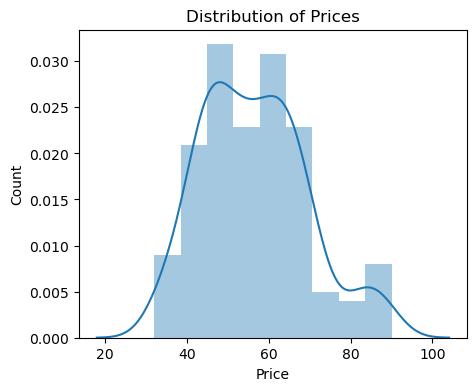

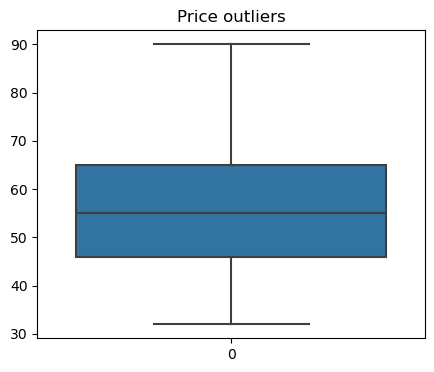

In [11]:
#Analysing Price for distribution and outliers
plt.figure(figsize=(5,4))
sns.distplot(house_data["Price"])
plt.title("Distribution of Prices")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(house_data["Price"])
plt.title("Price outliers")
plt.show()


***
_So,the initial analysis reveals that the distribution of price is a normal distribution._


_The second analysis indicates an absence of outliers in the Price data._
***

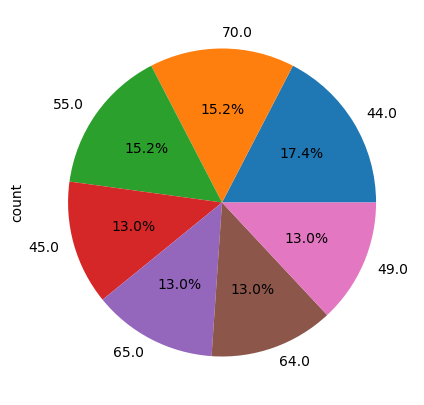

In [12]:
#Analysing Price with Pie 
plt.figure(figsize=(6,5))
house_data["Price"].value_counts().head(7).plot.pie(autopct="%1.1f%%")
plt.show()

***
_Price range of **44.0** has maximum houses i.e. **17.4%**_
***

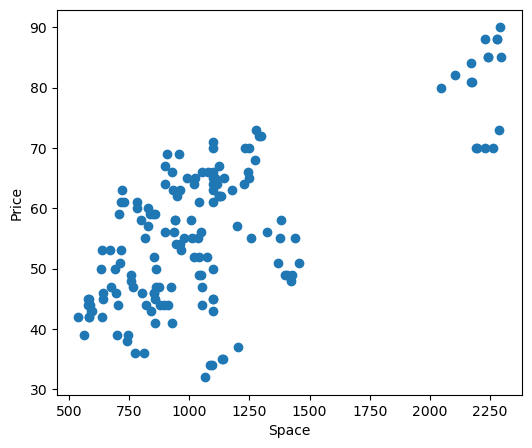

In [13]:
#Analysing Price with Space
plt.figure(figsize=(6,5))
plt.scatter(house_data["Space"],house_data["Price"])
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

***
_Maximum data points are forming a cluster_
***

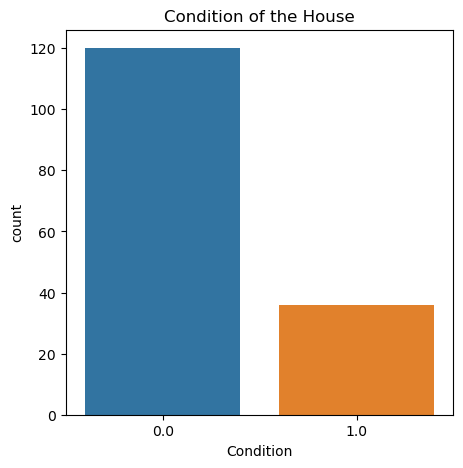

In [14]:
#Checking the condition of the house
plt.figure(figsize=(5,5))
sns.countplot(data=house_data, x='Condition')
plt.title("Condition of the House")
plt.show()

***
_The countplot suggests that there are more houses in "bad condition" than in "good condition."_
***

<Figure size 400x300 with 0 Axes>

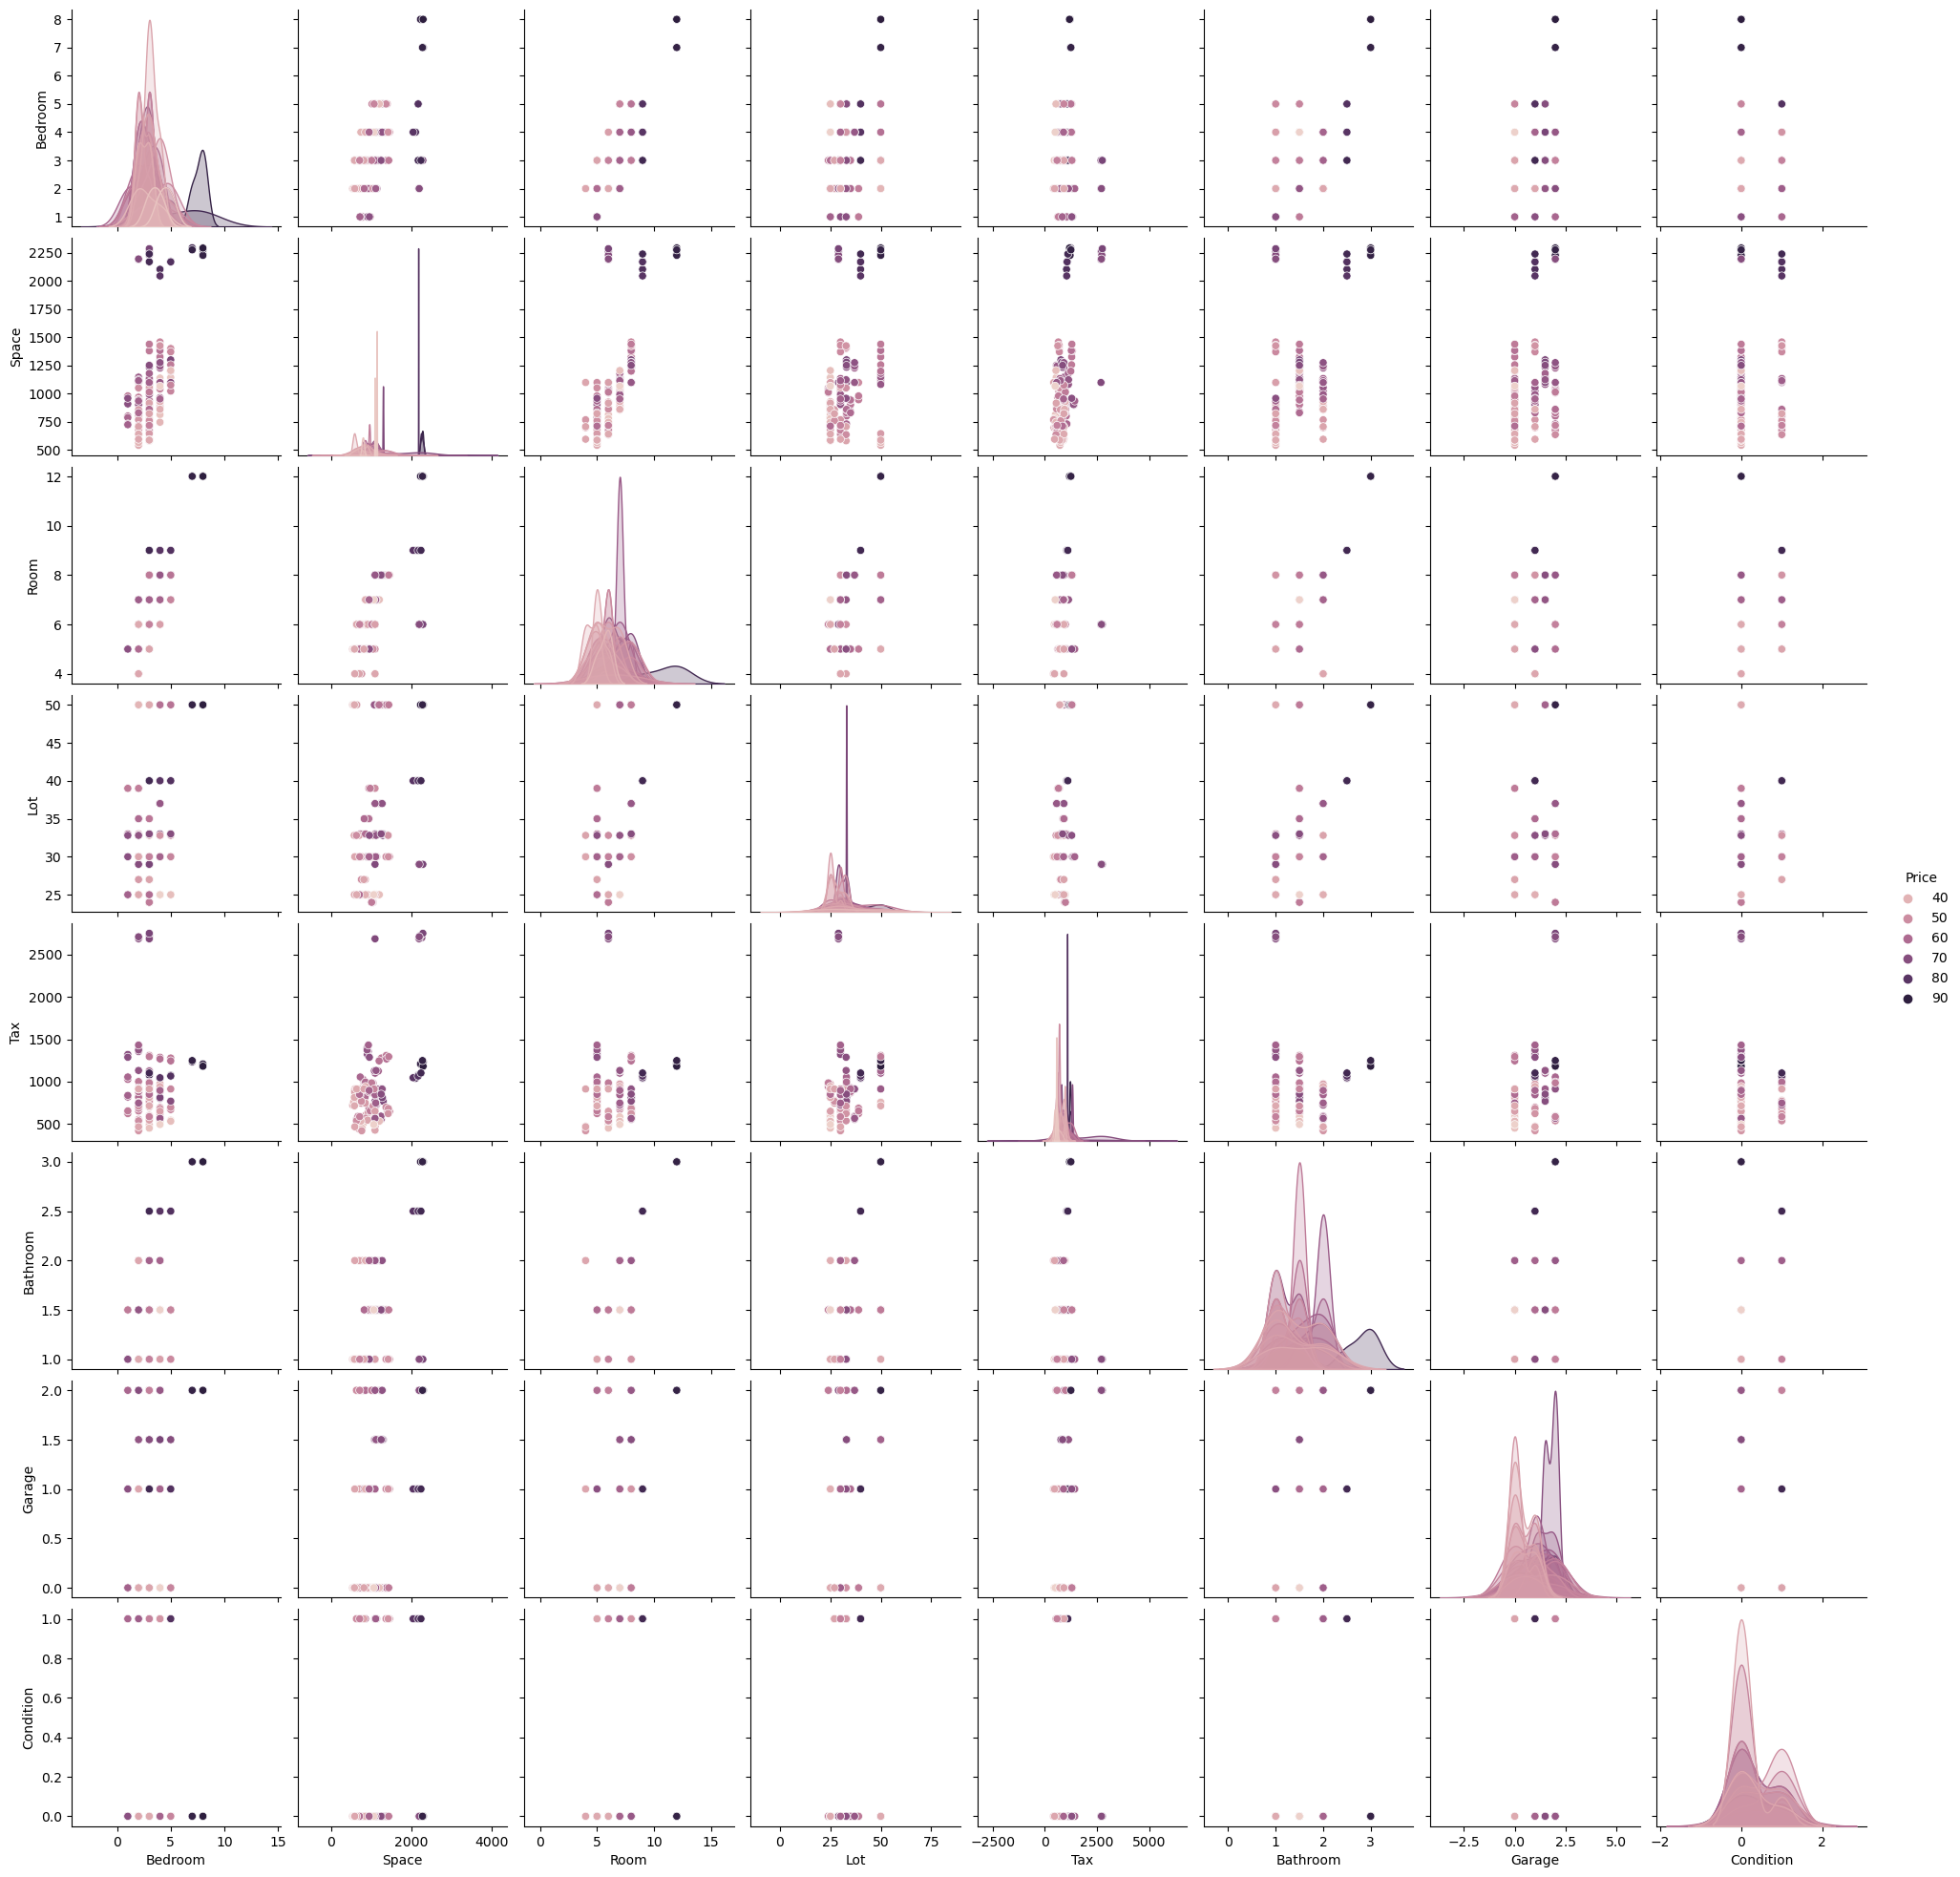

In [15]:
#Visualizing Pairplot
plt.figure(figsize=(4,3))
sns.pairplot(house_data,hue="Price")
plt.show()

Seperating data into X and Y
---------

In [16]:
x=house_data.iloc[:,1:]
y=house_data["Price"]

In [17]:
x

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,2.0,967.0,5.0,39.0,652.000000,1.5,0.0,0.0
1,2.0,815.0,5.0,33.0,1000.000000,1.0,2.0,1.0
2,3.0,900.0,5.0,35.0,897.000000,1.5,1.0,0.0
3,3.0,1007.0,6.0,24.0,964.000000,1.5,2.0,0.0
4,3.0,1100.0,7.0,50.0,1099.000000,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...
151,3.0,585.0,5.0,50.0,713.000000,1.0,0.0,0.0
152,3.0,820.0,5.0,27.0,911.707483,1.0,0.0,1.0
153,2.0,593.0,4.0,30.0,465.000000,2.0,1.0,0.0
154,3.0,716.0,6.0,30.0,585.000000,1.0,2.0,1.0


Splitting the data into train and test
---------

In [18]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

#Splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.12,random_state=20)

In [19]:
print(x.shape,xtrain.shape,xtest.shape)

(156, 8) (137, 8) (19, 8)


Scaling down the values
---------

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [21]:
xtrain

array([[ 0.66435398, -0.54425428,  0.31549223, ...,  0.98787539,
         0.18155205, -0.57454076],
       [ 0.66435398,  0.72373646,  0.91580384, ..., -0.9183067 ,
         0.18155205,  1.74052054],
       [-0.08784846, -0.24801573,  0.31549223, ...,  0.98787539,
         0.18155205, -0.57454076],
       ...,
       [-0.8400509 ,  2.4562831 , -0.28481938, ..., -0.9183067 ,
         1.4251836 , -0.57454076],
       [-0.8400509 , -0.71706009, -0.88513098, ..., -0.9183067 ,
        -1.0620795 , -0.57454076],
       [-0.08784846, -1.02900826, -0.88513098, ..., -0.9183067 ,
        -1.0620795 , -0.57454076]])

In [22]:
y

0      53.0
1      55.0
2      56.0
3      58.0
4      64.0
       ... 
151    42.0
152    44.0
153    43.0
154    53.0
155    62.0
Name: Price, Length: 156, dtype: float64

Model Building
---

In [23]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression

#Assigning variable
lr=LinearRegression()

#Training the model
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [24]:
ypred

array([84.76817096, 62.7564567 , 53.79775791, 60.95967837, 46.0772124 ,
       69.47492316, 61.54135743, 49.01430841, 62.45248444, 44.9239306 ,
       43.26125582, 48.07479565, 63.66164985, 77.26391145, 58.04179497,
       50.47187218, 50.24244848, 42.32116722, 44.88022545])

In [25]:
# #Finding the slope value
lr.coef_

array([-4.71139637,  2.4175694 ,  5.15196161,  1.50833847,  3.31791861,
        3.04712633,  3.01386676,  0.55090284])

In [26]:
# #Finding the intercept value
lr.intercept_

56.52554744525548

In [27]:
#Checking r2_score
from sklearn.metrics import r2_score

r2_score(ytest,ypred)

0.8811014325691593

Hypertuning with Lasso
---

In [28]:
#Importing Lasso
from sklearn.linear_model import Lasso

#Assigning variable
ls=Lasso()

#Training the model
ls.fit(xtrain,ytrain)
ypred_lasso=ls.predict(xtest)

In [29]:
#Finding the slope value
ls.coef_

array([-0.        ,  4.0314991 ,  0.11752477,  1.30759456,  1.81226147,
        2.07343032,  2.87352023,  0.        ])

In [30]:
#Finding the intercept value
ls.intercept_

56.52554744525548

In [31]:
#Checking r2_score
r2_score(ytest,ypred_lasso)

0.8118759497321204

Hypertuning with Ridge
---

In [32]:
#Importing Ridge
from sklearn.linear_model import Ridge

#Assigning variable
rd=Lasso()

#Training the model
rd.fit(xtrain,ytrain)
ypred_ridge=rd.predict(xtest)

In [33]:
#Finding the slope value
rd.coef_

array([-0.        ,  4.0314991 ,  0.11752477,  1.30759456,  1.81226147,
        2.07343032,  2.87352023,  0.        ])

In [34]:
#Finding the intercept value
rd.intercept_

56.52554744525548

In [35]:
#Checking r2_score
r2_score(ytest,ypred_ridge)

0.8118759497321204

Accuracy of this model with an R-squared score is 0.88, this model is estimated to provide accurate results for approximately 88% of the cases, indicating that it is a good fit for the data.
===